In [364]:
# Importing required module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.simplefilter("ignore")

## Loading Dataset

In [365]:
# Importing Data
data = pd.read_csv('census-income_final.csv', skipinitialspace=True)

## Understanding Dataset

In [366]:
# Shape of the dataset
data.shape

(32561, 15)

In [367]:
# Top 5 rows
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [368]:
# Checking Null Values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

There is not null values present in the dataset.

In [369]:
# Renaming the target feature
data.rename(columns={'Unnamed: 14': 'annual_income'}, inplace=True)

In [370]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [371]:
data[data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [372]:
data.drop_duplicates(inplace=True)

In [373]:
# Categorical feature
cat_feature = [feature for feature in data.columns if (data[feature].dtype == 'O') & (feature != 'annual_income')]

In [374]:
cat_feature

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [375]:
# Count of unique feature for categorical column
for feature in cat_feature:
    print("Feature: {}".format(feature))
    print(data[feature].value_counts())
    print('\n\n\n')

Feature: workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64




Feature: education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64




Feature: marital-status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64




Feature: occupation
Prof-spe

In [376]:
# Dropping unknown feature for the column Workclass
data.drop(data[data['workclass'] == '?'].index, inplace=True)

In [377]:
# Dropping unknown feature for the column Occupation
data.drop(data[data['occupation'] == '?'].index, inplace=True)

In [378]:
# Dropping unknown feature for the column Native-country
data.drop(data[data['native-country'] == '?'].index, inplace=True)

In [379]:
# Shape of dataset
data.shape

(30139, 15)

In [380]:
# Number of unique feature for Categorical column
print('No of Unique Feature in Categorical Column!')
for feature in cat_feature:
    print("{}: {}".format(feature, data[feature].nunique()))

No of Unique Feature in Categorical Column!
workclass: 7
education: 16
marital-status: 7
occupation: 14
relationship: 6
race: 5
sex: 2
native-country: 41


## Data Visualisation

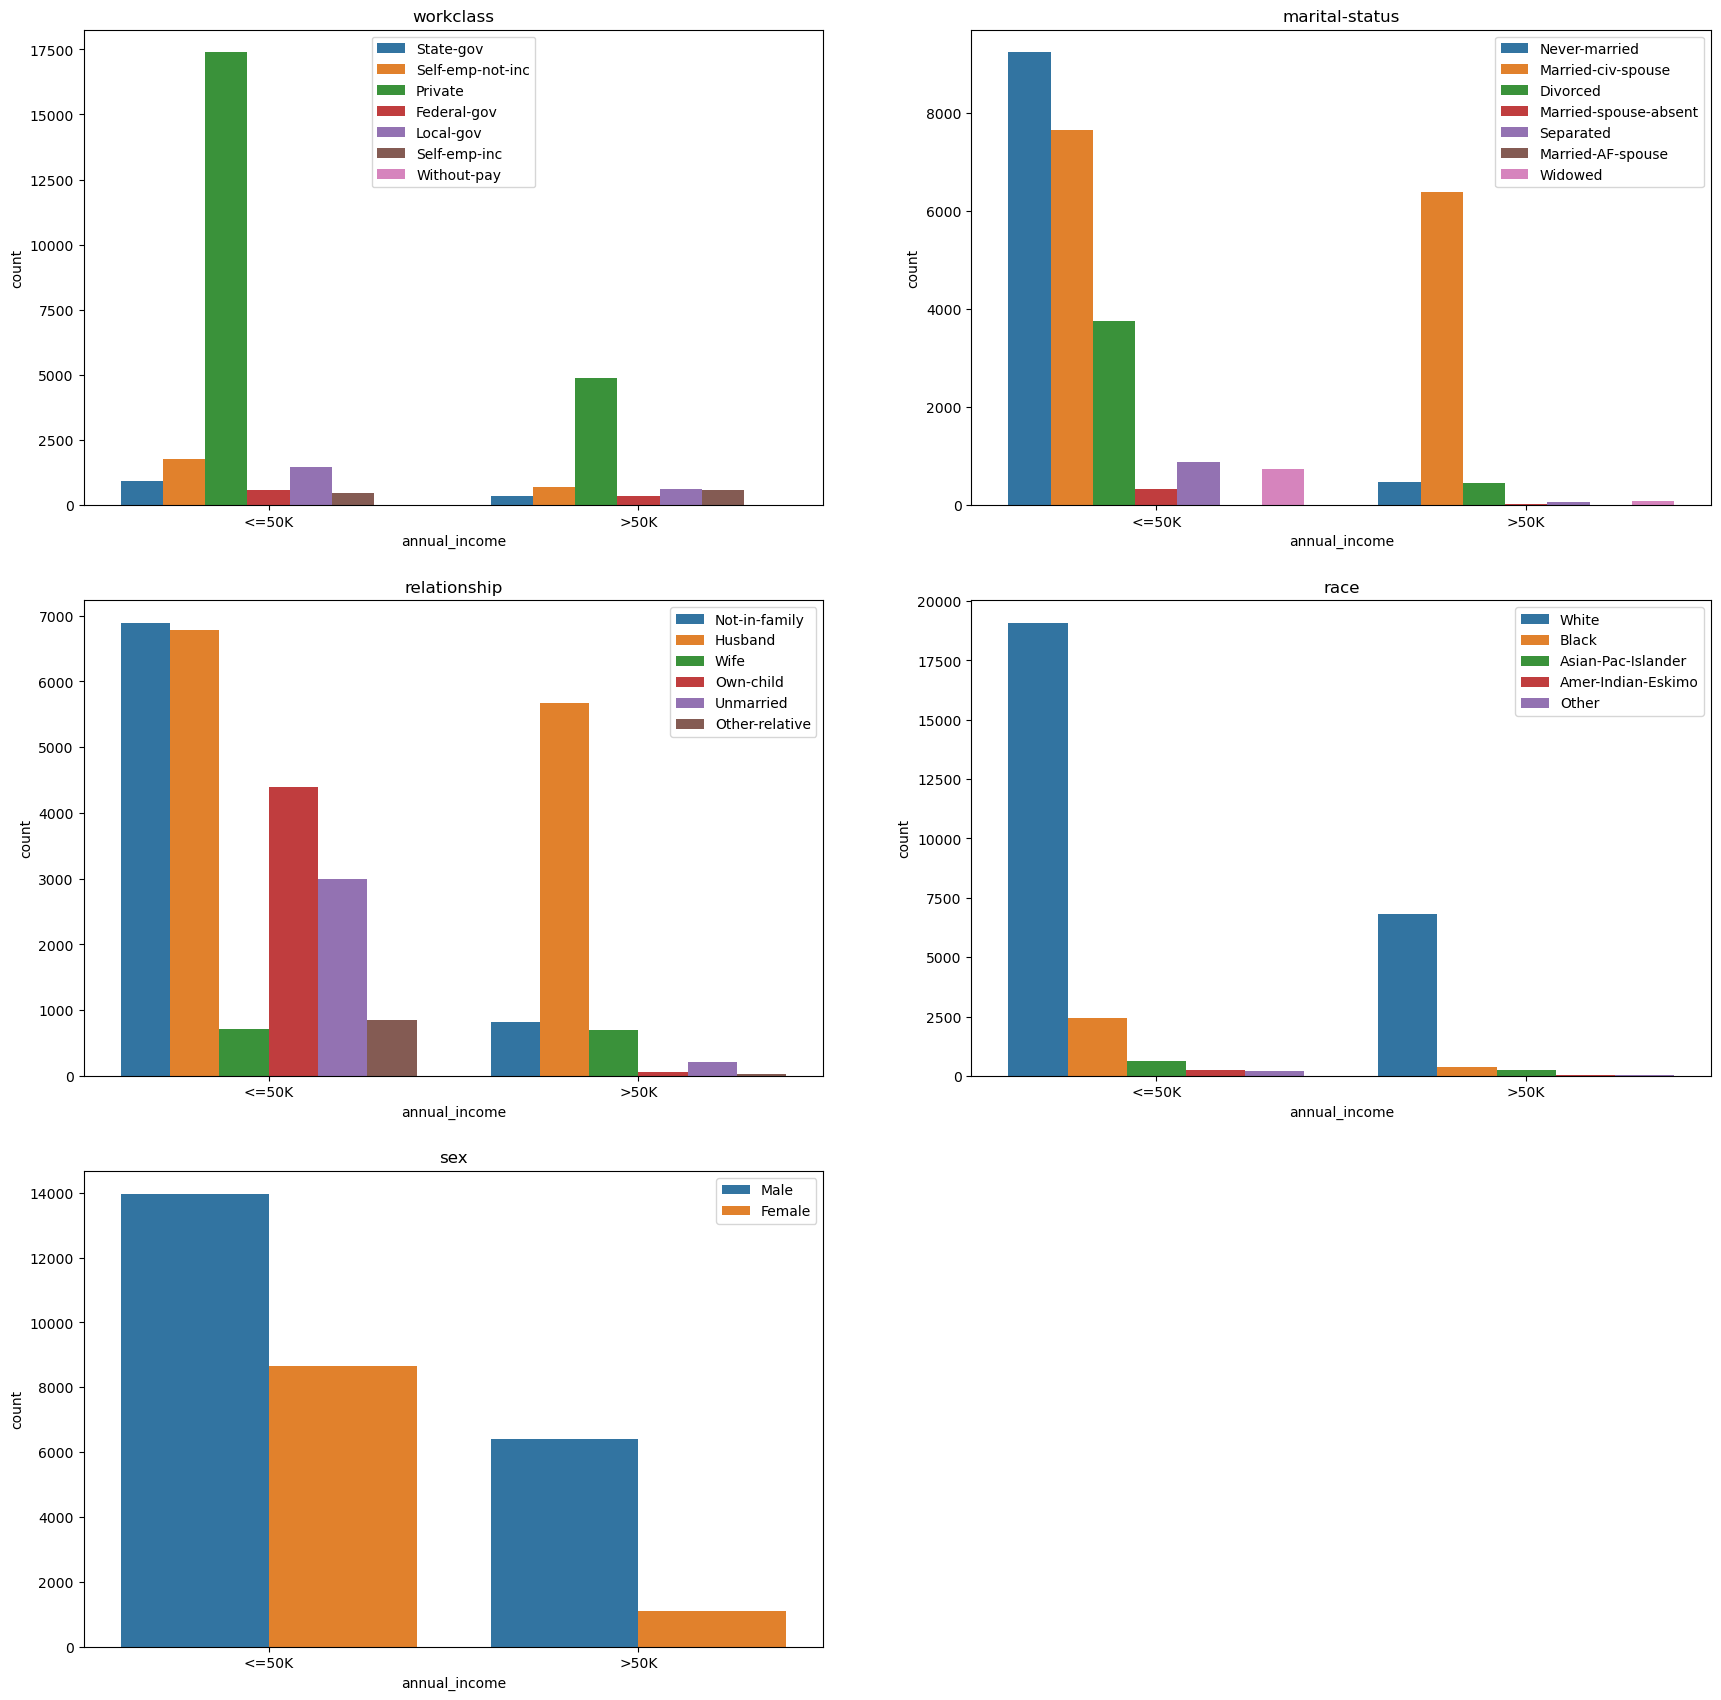

In [381]:
# Checking relation ship between Various categorical column with target feature
cat_plot = [feature for feature in cat_feature if data[feature].nunique() < 8]
plt.figure(figsize=(21,21))
for feature in cat_plot:    
    plt.subplot(3, 2, cat_plot.index(feature)+1)
    sns.countplot(x='annual_income', data=data, hue=feature)
    plt.title(feature)
    plt.legend(loc='best')

### Inferences

Workclass: Most of the people in both class of annual income (<=50K & >50K) belongs to private workclass.

Marital-Status: Never married people are most in number followed by married-civ spouse and Divorsed in the class <=5k of 
                target feature where as married-civ spouse is most in number for class >50K of target feature.
                
Relationship: Most of the people for class <=50K of annual income are not in family followed by Husband and wife are least in                 count. For class >50K of annual income, Husband are most in count.

Race: White people are most in number for both class of annual income followed by black people.

Sex: Male people are most in number for both class of annual income.

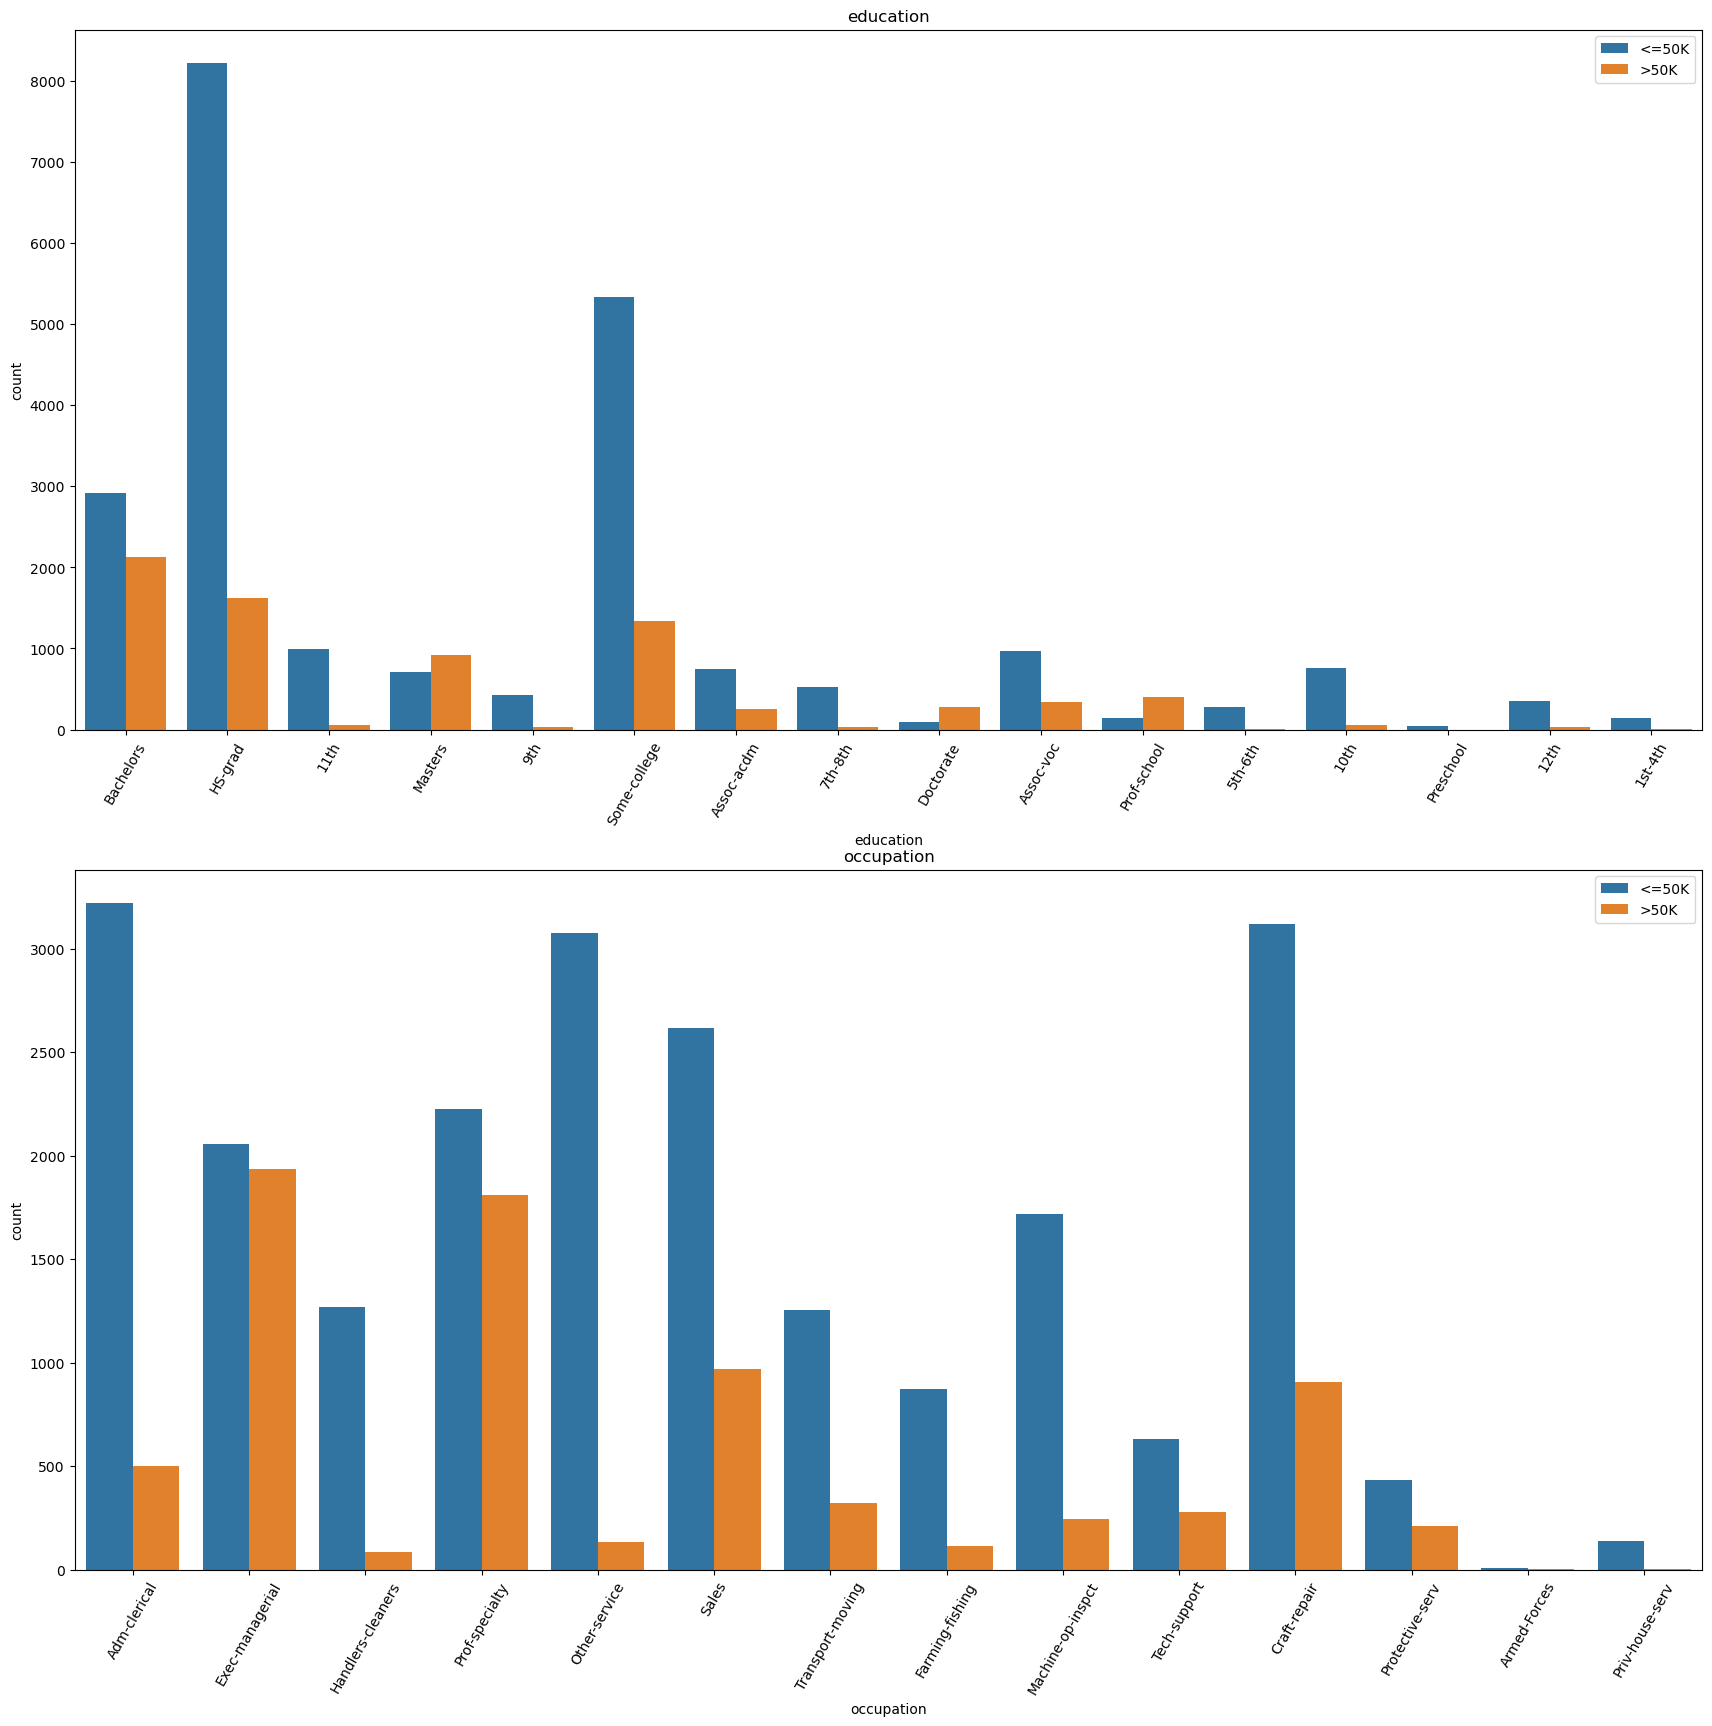

In [382]:
# Checking relation ship between Various categorical column with target feature
cat_plot = [feature for feature in cat_feature if (7 < data[feature].nunique() < 17)]
plt.figure(figsize=(21,20))
for feature in cat_plot:    
    plt.subplot(2, 1, cat_plot.index(feature)+1)
    sns.countplot(x=feature, data=data, hue='annual_income')
    plt.xticks(rotation=60)
    plt.title(feature)
    plt.legend(loc='best')

## Inferences:


 Education: Hs-grad is most in number followed by some-college for class <=50K of annual income. Bachelors are most in number               followed by Hs-grad for class >50K of annual income. 
 
 Occupation: Adm-clerical has highest count followed by Other-services and Craft-repair for class <=50K of annual income. Exec-              managerial is most in count followed Prof-speciality for class >50K of annual income.
 

In [383]:
# Extracting numerical feature
num_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
print('No of Unique Feature!')
for feature in num_feature:
    print("{}: {}".format(feature, data[feature].nunique()))

No of Unique Feature!
age: 72
fnlwgt: 20263
education-num: 16
capital-gain: 118
capital-loss: 90
hours-per-week: 94


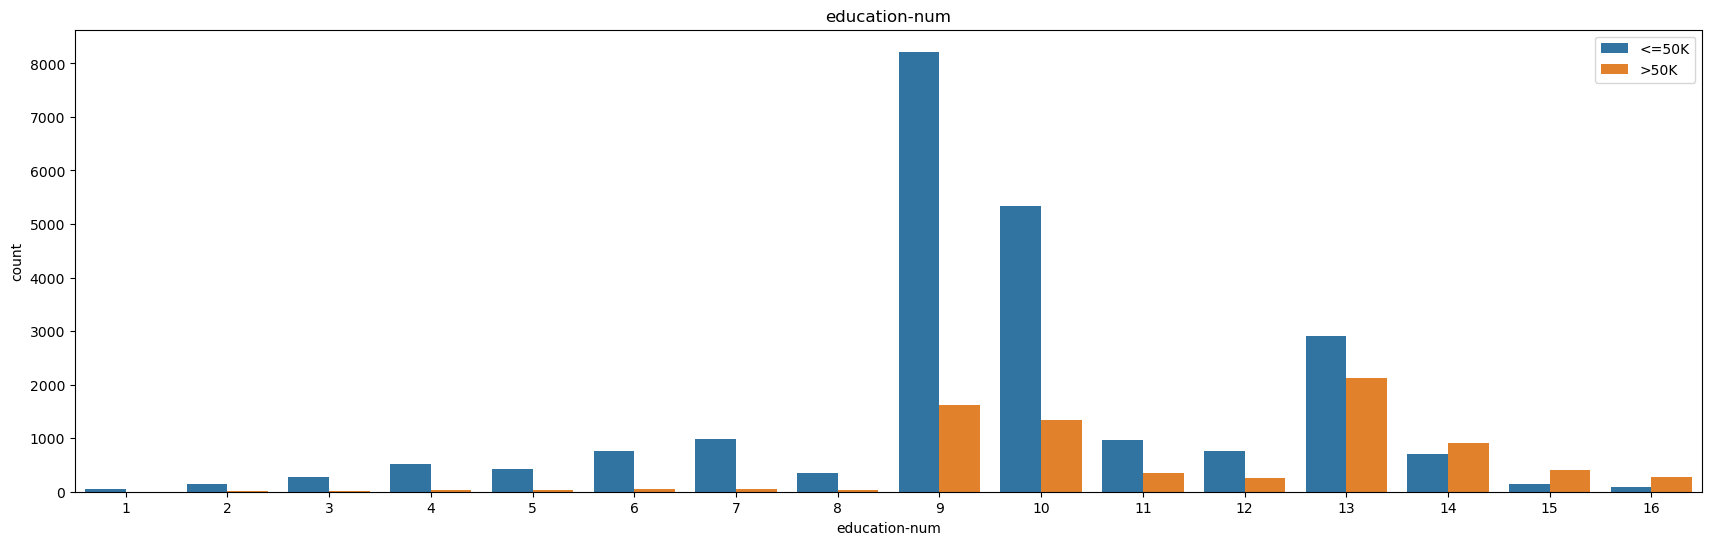

In [384]:
# Checking relationship education-num and the target feature.
plt.figure(figsize=(21, 6))
sns.countplot(x='education-num', data=data, hue='annual_income')
plt.title('education-num')
plt.legend(loc='best')
plt.show()

## Inference:

Education-num: 9 has highest count followed by 10 and 13 for class <=50K of annual income where as 13 is most in number followed by 9 and 10 for class >50K of annual income. 

In [385]:
# Continuous Feature
cont_feature = [feature for feature in num_feature if feature != 'education-num']

age_Skewness: 0.5289710877265393
fnlwgt_Skewness: 1.4600554384907176
capital-gain_Skewness: 11.898104207745183
capital-loss_Skewness: 4.524408859698649
hours-per-week_Skewness: 0.3323859714019701


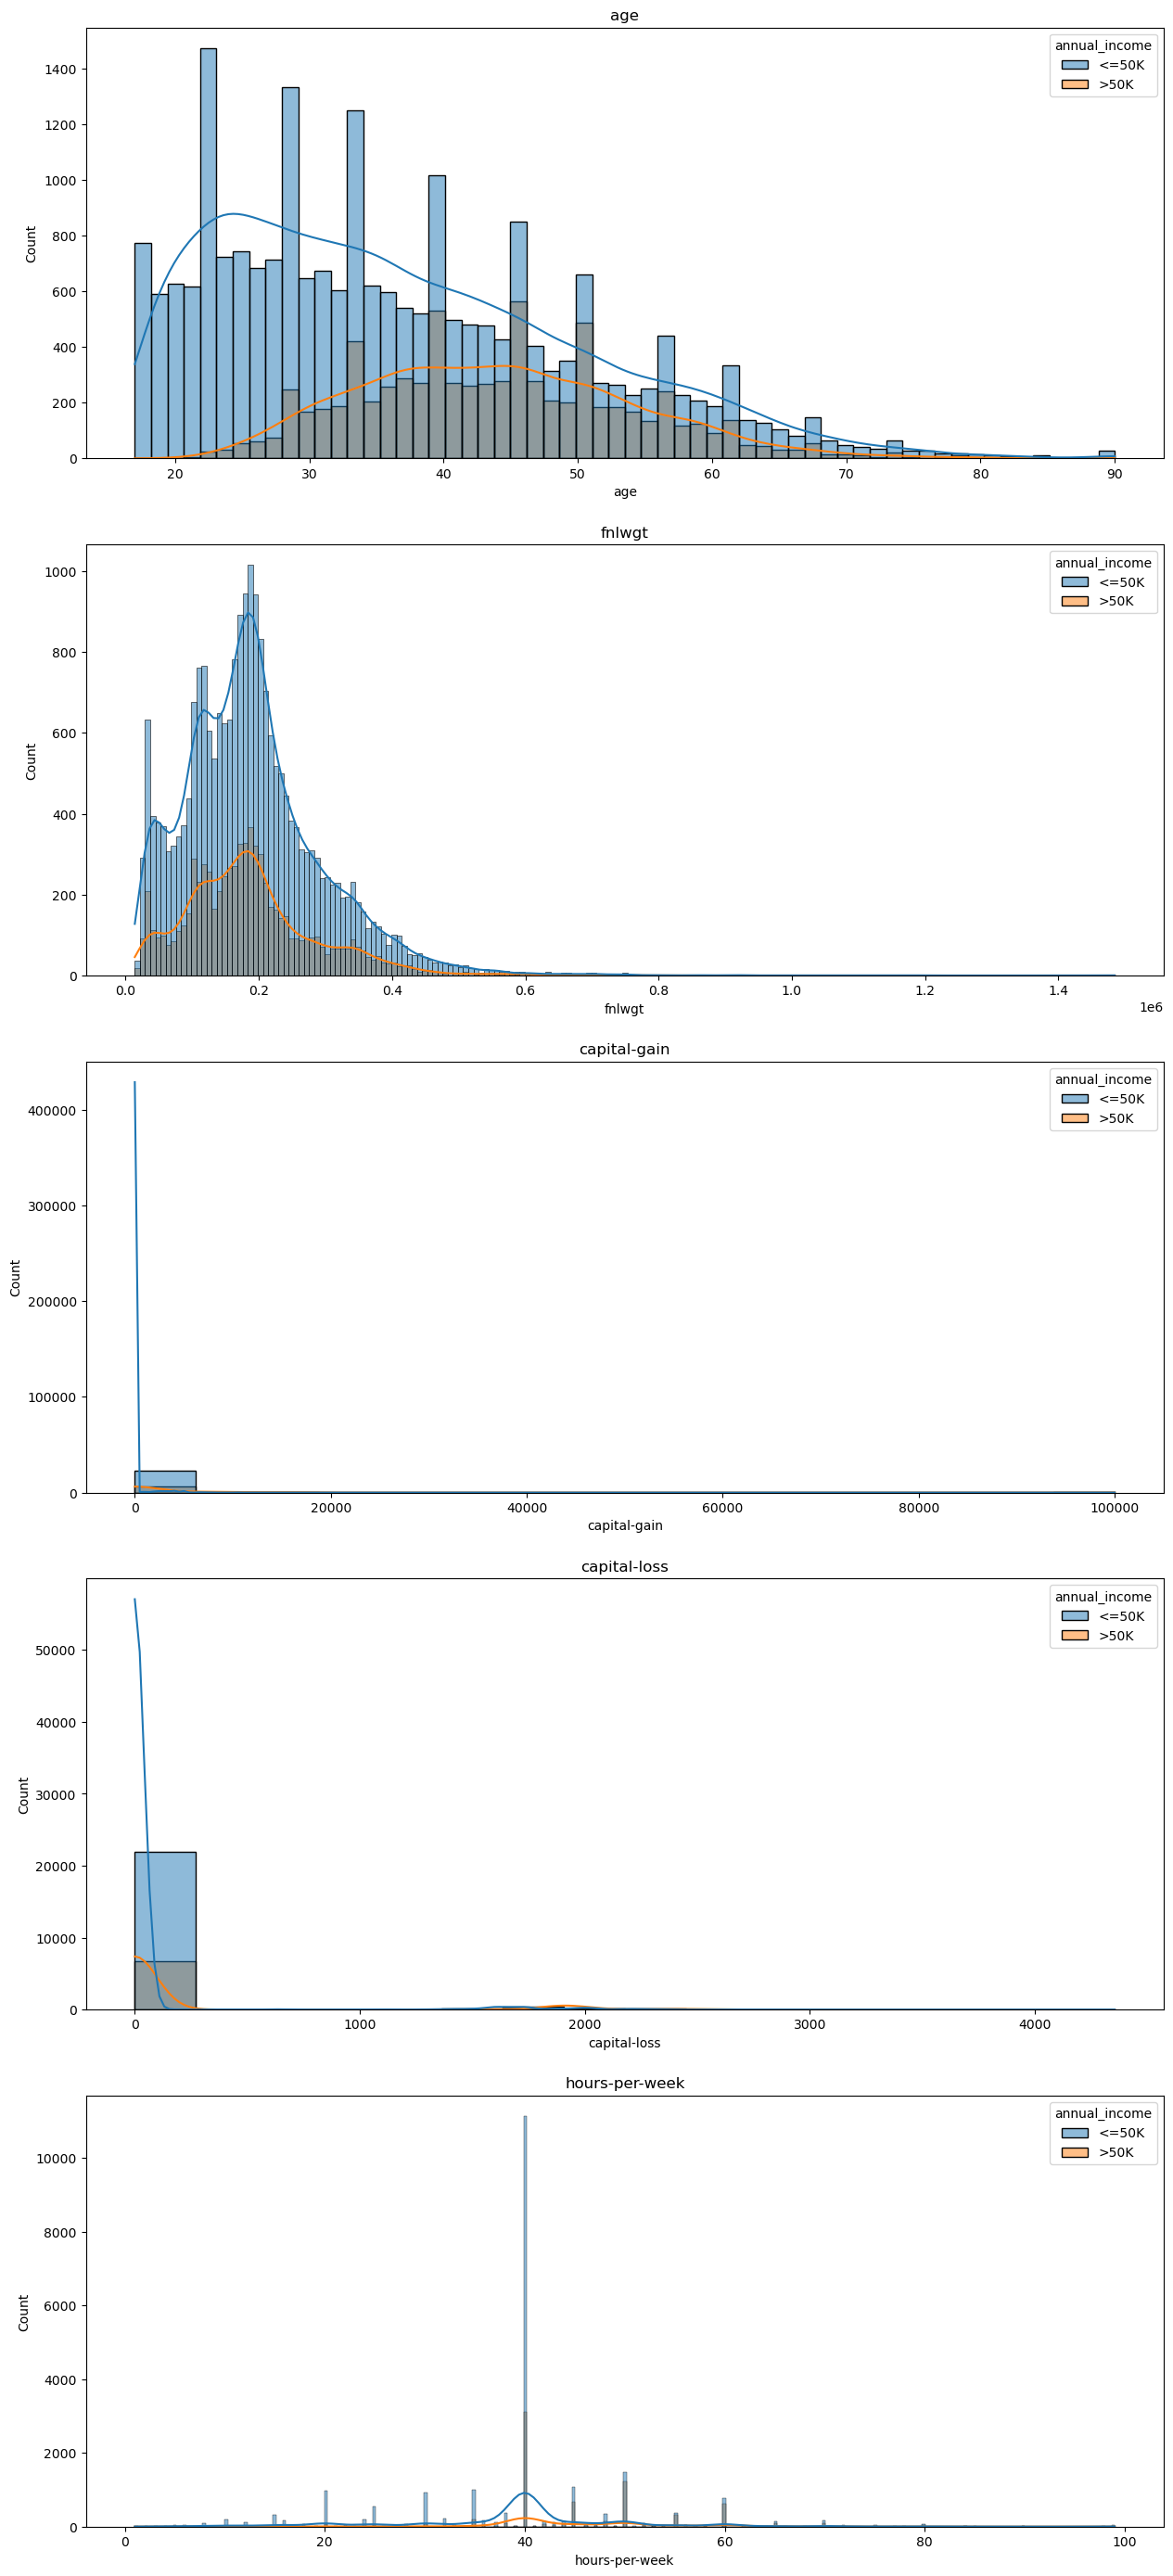

In [386]:
# Checking distribution of continuous feature
plt.figure(figsize=(15, 35))
for feature in cont_feature:
    print("{}_Skewness: {}".format(feature, data[feature].skew()))
    plt.subplot(5, 1, cont_feature.index(feature) + 1)
    sns.histplot(data=data,x=feature, hue = 'annual_income', kde=True)
    plt.title(feature)       

## Inferences:

Age: Distribution is positively skewed with skewness 0.53.

Fnlwgt: Distribution is positively skewed with skewness 1.45.

Capital Gain: Distribution is highly positively skewed with skewness 11.90.

Capital Loss: Distribution is positively skewed with skewness 4.52.

Hours-per-week: Distribution is positively skewed with skewness 0.33.

## Label Encoder

In [387]:
# Encoding Categorical feature
le = LabelEncoder()
for feature in cat_feature:
    data[feature] = le.fit_transform(data[feature])

In [388]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K


## Multicollinearity

In [510]:
# Checking Varience Inflation Factor for each input feature.
input_feature = [feature for feature in data.columns if feature != 'annual_income']
x = data[input_feature]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,9.424951
1,workclass,6.247035
2,fnlwgt,4.031034
3,education,9.419809
4,education-num,19.091501
5,marital-status,4.016444
6,occupation,3.204520
7,relationship,2.620528
8,race,18.455946
9,sex,4.593405


In [511]:
# Deleting the feature where VIF is maximun and is greater than 6.
x = x.drop(['native-country'], axis=1)

In [512]:
# Checking Varience Inflation Factor for each input feature.
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,8.961480
1,workclass,6.195814
2,fnlwgt,4.010444
3,education,9.263025
4,education-num,18.197971
5,marital-status,3.896629
6,occupation,3.193783
7,relationship,2.495917
8,race,15.996617
9,sex,4.517778


In [513]:
# Deleting the feature where VIF is maximun and is greater than 6.
x = x.drop(['education-num'], axis=1)

In [514]:
# Checking Varience Inflation Factor for each input feature.
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,8.736886
1,workclass,6.152469
2,fnlwgt,4.000417
3,education,7.601306
4,marital-status,3.851544
5,occupation,3.119064
6,relationship,2.485181
7,race,15.347168
8,sex,4.516834
9,capital-gain,1.035576


In [515]:
# Deleting the feature where VIF is maximun and is greater than 6.
# Checking Varience Inflation Factor for each input feature.
x = x.drop(['race'], axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,8.037073
1,workclass,5.987543
2,fnlwgt,3.935695
3,education,7.278408
4,marital-status,3.727969
5,occupation,3.090105
6,relationship,2.410697
7,sex,4.371132
8,capital-gain,1.034925
9,capital-loss,1.058071


In [516]:
# Deleting the feature where VIF is maximun and is greater than 6.
# Checking Varience Inflation Factor for each input feature.
x = x.drop(['hours-per-week'], axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,7.123092
1,workclass,5.818210
2,fnlwgt,3.865702
3,education,6.699310
4,marital-status,3.711833
5,occupation,3.050389
6,relationship,2.388003
7,sex,4.001516
8,capital-gain,1.033479
9,capital-loss,1.056833


In [517]:
# Deleting the feature where VIF is maximun and is greater than 6.
# Checking Varience Inflation Factor for each input feature.
x = x.drop(['age'], axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,workclass,5.229963
1,fnlwgt,3.776126
2,education,5.910759
3,marital-status,3.711299
4,occupation,2.976133
5,relationship,2.381231
6,sex,3.835931
7,capital-gain,1.030315
8,capital-loss,1.052693


In [518]:
x.head()

,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss
0,5,77516,9,4,0,1,1,2174,0
1,4,83311,9,2,3,0,1,0,0
2,2,215646,11,0,5,1,1,0,0
3,2,234721,1,2,5,0,1,0,0
4,2,338409,9,2,9,5,0,0,0


## Treating Skewness continuous feature

In [519]:
# Continuous Feature
cont_feature_final = [feature for feature in cont_feature if feature in x.columns]
cont_feature_final

['fnlwgt', 'capital-gain', 'capital-loss']

In [520]:
# Calculating Skewness
for feature in cont_feature_final:
    print("{}_Skewness: {}".format(feature, data[feature].skew()))

fnlwgt_Skewness: 1.4600554384907176
capital-gain_Skewness: 11.898104207745183
capital-loss_Skewness: 4.524408859698649


In [521]:
# Making a copy of dataset and applying power transformer to deal with skewed data
pt = PowerTransformer()
X = x.copy()
for i in cont_feature_final:
    X[i] = pt.fit_transform(x[[i]])

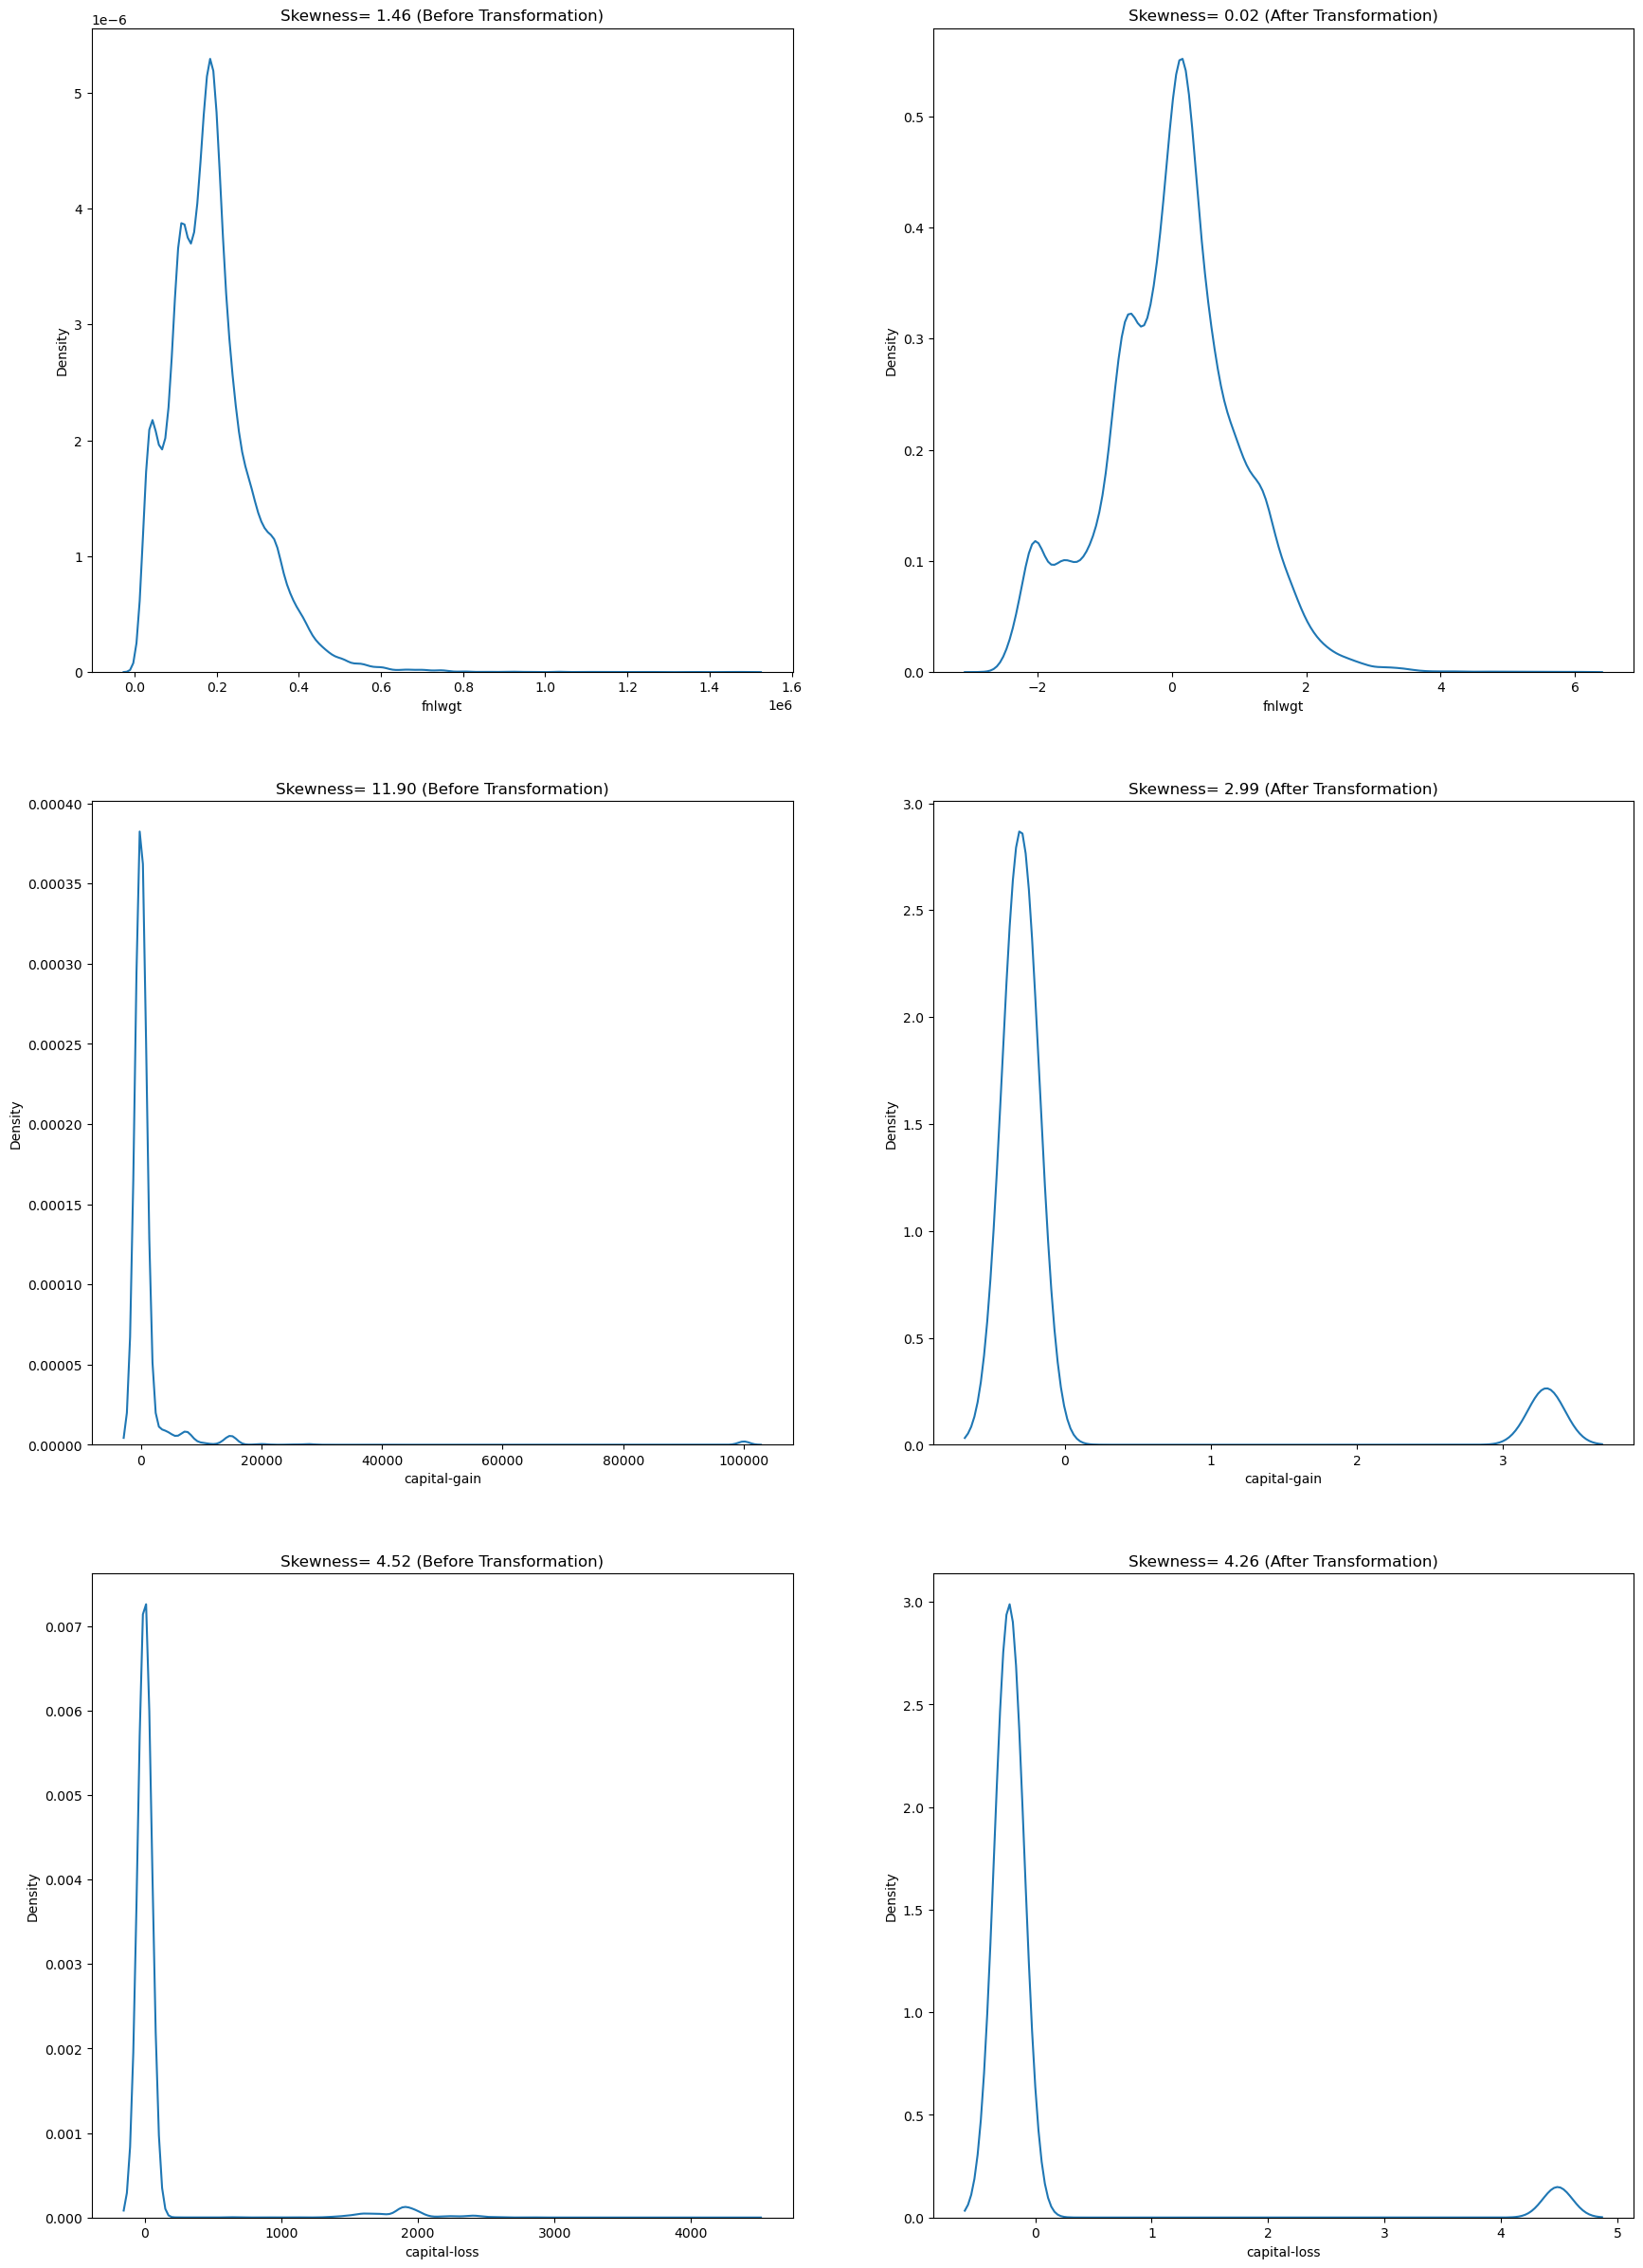

In [522]:
# Distribution plot before and after applying power transform
plt.figure(figsize=(21,30))
for i in cont_feature_final:
    plt.subplot(3,2,(cont_feature_final.index(i)*2)+1)
    plt.title('{}= {} (Before Transformation)'.format('Skewness', '%.2f'%x[i].skew()))
    sns.kdeplot(x[i])
    
    plt.subplot(3,2,(cont_feature_final.index(i)*2)+2)
    plt.title('{}= {} (After Transformation)'.format('Skewness', '%.2f'%X[[i]].skew()))
    sns.kdeplot(X[i])

In [523]:
# Target feature
y = data['annual_income']
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: annual_income, Length: 30139, dtype: object

## Standardizing Data

In [524]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 2.93501098, -1.18004055, -0.34970067, ...,  0.69272535,
         3.29768877, -0.22293603],
       [ 1.88701383, -1.08951447, -0.34970067, ...,  0.69272535,
        -0.30323784, -0.22293603],
       [-0.20898049,  0.39900341,  0.17495914, ...,  0.69272535,
        -0.30323784, -0.22293603],
       ...,
       [-0.20898049, -0.21914739,  0.17495914, ..., -1.44357356,
        -0.30323784, -0.22293603],
       [-0.20898049,  0.27203075,  0.17495914, ...,  0.69272535,
        -0.30323784, -0.22293603],
       [ 0.83901667,  0.98176988,  0.17495914, ..., -1.44357356,
         3.29779817, -0.22293603]])

# Checking Class distribution of output column

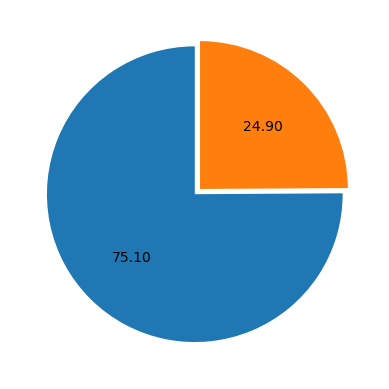

In [525]:
plt.pie(x=y.value_counts(), autopct="%.2f", explode=(0, 0.05), startangle=90)
plt.show()

#### We will use SMOTE to deal  with imbalance data.

In [526]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [527]:
# Application of Smote technique for imbalance data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [528]:
y_train_res.value_counts()

<=50K    15884
>50K     15884
Name: annual_income, dtype: int64

# Logistics Regression

In [529]:
p= X_train_res
q = y_train_res
r= X_test
s = y_test

In [534]:
# Logistic regression Approach
lr = LogisticRegression()
lr.fit(p, q)
print("Test_data_Classification_report: ")
print(classification_report(lr.predict(r), s))
print('\n')
print("Train_data_Classification_report: ")
print(classification_report(lr.predict(p), q))

Test_data_Classification_report: 
              precision    recall  f1-score   support

       <=50K       0.65      0.92      0.76      4792
        >50K       0.82      0.44      0.58      4250

    accuracy                           0.69      9042
   macro avg       0.74      0.68      0.67      9042
weighted avg       0.73      0.69      0.67      9042



Train_data_Classification_report: 
              precision    recall  f1-score   support

       <=50K       0.64      0.77      0.70     13171
        >50K       0.81      0.69      0.74     18597

    accuracy                           0.72     31768
   macro avg       0.72      0.73      0.72     31768
weighted avg       0.74      0.72      0.72     31768



# Decision Tree

In [ ]:
# Hyper Parameter Tuning
dc = DecisionTreeClassifier()
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', None],
   'min_samples_split' : [2,3,4,5,6,7,8,9],
   'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
    'max_leaf_nodes' : [2,5,10,15,20,30,50],
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9],}

In [483]:
# GridSearchCV application for hyper-parameter tuning
cv = GridSearchCV(dc, param_grid=parameter, scoring='accuracy', n_jobs=-1, cv=10)

In [484]:
cv.fit(X_train_res, y_train_res)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 20],
                         'max_features': ['auto', None],
                         'max_leaf_nodes': [2, 5, 10, 15, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [485]:
# Best Parameter
cv.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [532]:
# Decision Tree approach
dc = DecisionTreeClassifier(
    max_depth= 14,
 max_leaf_nodes= 50,
 min_samples_leaf= 9,
 min_samples_split= 2)
dc.fit(p, q)
print("Test_data_Classification_report: ")
print(classification_report(dc.predict(r), s))
print('\n')
print("Train_data_Classification_report: ")
print(classification_report(dc.predict(p), q))

Test_data_Classification_report: 
              precision    recall  f1-score   support

       <=50K       0.77      0.93      0.84      5619
        >50K       0.82      0.55      0.66      3423

    accuracy                           0.79      9042
   macro avg       0.80      0.74      0.75      9042
weighted avg       0.79      0.79      0.77      9042



Train_data_Classification_report: 
              precision    recall  f1-score   support

       <=50K       0.76      0.86      0.81     14008
        >50K       0.88      0.79      0.83     17760

    accuracy                           0.82     31768
   macro avg       0.82      0.83      0.82     31768
weighted avg       0.83      0.82      0.82     31768



# Random Forest

In [348]:
# Number of estimator selection
test = [5,6,7,8,9,10,11,12,13,14,15,20,50,100,200,400,500]
est = []
acc = []
for i in test:
    rf = RandomForestClassifier(n_estimators= i,
                            max_depth= 14,
                            max_leaf_nodes= 50,
                            min_samples_leaf= 9,
                            min_samples_split= 2, 
                            random_state=42)
    rf.fit(X_train_res, y_train_res)
    accu = accuracy_score(rf.predict(X_test), y_test)
    est.append(i)
    acc.append(accu)
df1 = pd.DataFrame()
df1['Accuracy'] = acc
df1['sample'] = est
    

In [349]:
df1[df1['Accuracy']== df1['Accuracy'].max()]

,Accuracy,sample
5,0.770737,10


In [533]:
# Random Forest approach
rf = RandomForestClassifier(n_estimators=10,
                            max_depth= 14,
 max_leaf_nodes= 50,
 min_samples_leaf= 9,
 min_samples_split= 2, random_state=42)
rf.fit(p, q)
print("Test_data_Classification_report: ")
print(classification_report(rf.predict(r), s))
print('\n')
print("Train_data_Classification_report: ")
print(classification_report(rf.predict(p), q))

Test_data_Classification_report: 
              precision    recall  f1-score   support

       <=50K       0.79      0.93      0.86      5722
        >50K       0.83      0.58      0.68      3320

    accuracy                           0.80      9042
   macro avg       0.81      0.75      0.77      9042
weighted avg       0.81      0.80      0.79      9042



Train_data_Classification_report: 
              precision    recall  f1-score   support

       <=50K       0.78      0.86      0.82     14464
        >50K       0.87      0.80      0.83     17304

    accuracy                           0.83     31768
   macro avg       0.83      0.83      0.83     31768
weighted avg       0.83      0.83      0.83     31768



## Score & Accuracy for different model

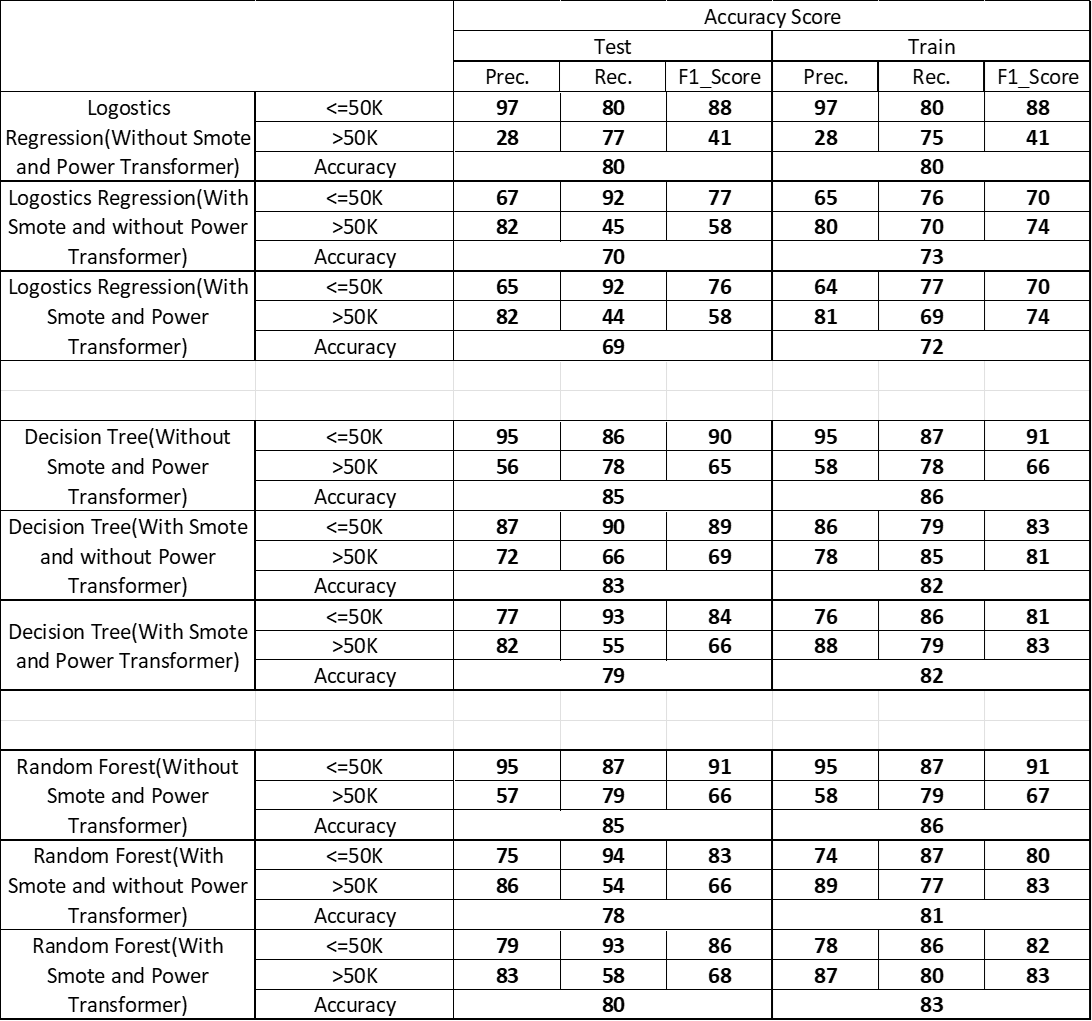